# RFM Analysis with python

# A Basic project on how to perform rfm analysis using python and segment customers.
- RFM Analysis is a valuable tool for improving customer segmentation, personalizing marketing efforts and increasing customer engagement and satisfaction.
1. Recency(R)- how recently a customer has made a purchase.
2. Frequency(F) how often a customer makes a purchase or interacts  with your business within a specific timeframe
3. Monetary(M)- amount of  money a customer has spent on your products or services within a given period

# link to dataset https://statso.io/rfm-analysis-case-study/

In [1]:
import pyforest ##An all in one package

In [2]:
df=pd.read_csv(r"C:\Users\ptah\Downloads\rfm_data.csv")  ##here we load the dataset using pandas
df

<IPython.core.display.Javascript object>

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris


In [3]:
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])   ###Convert PurchaseDate to datetime
df

<IPython.core.display.Javascript object>

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris


In [4]:
##Now Let's look for missing values
missing_data=df.isnull().sum()
##and then  check data types
data_types=df.dtypes
print("missing Data:")
print(missing_data)
print("\nData Types:")
print(data_types)

missing Data:
CustomerID            0
PurchaseDate          0
TransactionAmount     0
ProductInformation    0
OrderID               0
Location              0
dtype: int64

Data Types:
CustomerID                     int64
PurchaseDate          datetime64[ns]
TransactionAmount            float64
ProductInformation            object
OrderID                        int64
Location                      object
dtype: object


Great ...Our Data looks Great!! We can now proceed to performing RFM

In [5]:
##we can look at RFM for each customer
current_date=max(df["PurchaseDate"])
rfm_data=df.groupby("CustomerID").agg({
    "PurchaseDate":lambda x: (current_date -x.max()).days,
    "OrderID": "count",
    "TransactionAmount": "sum"
})


###Renaming Columns
rfm_data.rename(columns={
    "PurchaseDate": "Recency",
    "OrderID": "Frequency",
    "TransactionAmount": "MonetaryValue"
}, inplace=True)

In [6]:
print(rfm_data)

            Recency  Frequency  MonetaryValue
CustomerID                                   
1011             33          2        1129.02
1025             21          1         359.29
1029              0          1         704.99
1046             43          1         859.82
1049             13          1         225.72
...             ...        ...            ...
9941             42          1         960.53
9950             38          1         679.11
9954             12          1         798.01
9985             57          1          36.10
9991             30          1         626.81

[946 rows x 3 columns]


since we now have the recency, frequency and monetary score. It's time to normalise the ranking of the customers

In [7]:
rfm_data['R_rank'] = rfm_data['Recency'].rank(ascending=False)
rfm_data['F_rank'] = rfm_data['Frequency'].rank(ascending=False)
rfm_data['M_rank'] = rfm_data['MonetaryValue'].rank(ascending=False)

####normalizing rank of customers

rfm_data['R_rank_norm'] = (rfm_data['R_rank']/rfm_data['R_rank'].max())*100
rfm_data['F_rank_norm'] = (rfm_data['F_rank']/rfm_data['F_rank'].max())*100
rfm_data['M_rank_norm'] = (rfm_data['M_rank']/rfm_data['M_rank'].max())*100

rfm_data.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm_data.head()

,Recency,Frequency,MonetaryValue,R_rank_norm,F_rank_norm,M_rank_norm
CustomerID,,,,,,
1011,33,2,1129.02,47.331910,5.511022,2.219873
1025,21,1,359.29,64.727855,100.000000,67.970402
1029,0,1,704.99,100.000000,100.000000,33.298097
1046,43,1,859.82,27.908218,100.000000,16.807611
1049,13,1,225.72,78.762006,100.000000,78.858351


# Now let's calculate the RFM Score

This is calculated based upon; recency, frequency and monetary value normalize ranks
here we allow a scale of 5
RFM Score= 0.15*Recency score+0.28*Frequency score+0.57*Monetary score

In [8]:
rfm_data['RFM_Score'] =0.15*rfm_data['R_rank_norm']+0.28 * \
    rfm_data['F_rank_norm']+0.57*rfm_data['M_rank_norm']
rfm_data['RFM_Score'] *= 0.05
rfm_data = rfm_data.round(2)
rfm_data[['RFM_Score']] . head(10)

,RFM_Score
CustomerID,
1011,0.50
1025,3.82
1029,3.10
1046,2.09
1049,4.24
1082,3.13
1086,4.68
1104,4.22
1108,2.24


# Time to proceed to rating the customer based upon RFM Score

In [9]:
## rfm score    customer segment
## >4.5       Top customer
## 4 - 4.5    high value customer
## 3 - 4      medium_value customer
## 1.5 - 3     low_ value customer
## < 1.5      lost customer

In [10]:
rfm_data['Customer Segment'] = np.where(rfm_data['RFM_Score'] >
                                       4.5, "Top Customers",
                                       (np.where(
                                       rfm_data['RFM_Score'] > 4,
                                       "High value Customers",
                                       (np.where(
    rfm_data['RFM_Score'] > 3,
                                       "Medium value Customers",
                                       np.where(rfm_data['RFM_Score'] > 1.5,
                                               "LOW VALUE CUSTOMERS", "LOST CUSTOMERS"))))))
rfm_data[['RFM_Score', 'Customer Segment']].head(15)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,RFM_Score,Customer Segment
CustomerID,,
1011,0.50,LOST CUSTOMERS
1025,3.82,Medium value Customers
1029,3.10,Medium value Customers
1046,2.09,LOW VALUE CUSTOMERS
1049,4.24,High value Customers
1082,3.13,Medium value Customers
1086,4.68,Top Customers
1104,4.22,High value Customers
1108,2.24,LOW VALUE CUSTOMERS


# VISUALIZATION OF CUSTOMER SEGMENTS

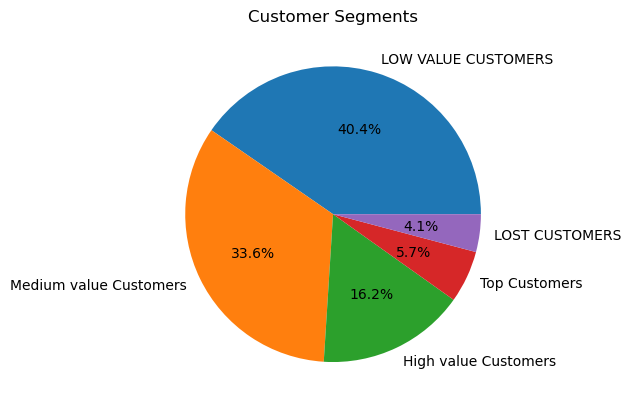

In [15]:
# Create a pie chart

plt.pie(rfm_data['Customer Segment'].value_counts(), labels=rfm_data['Customer Segment'].value_counts().index, autopct='%1.1f%%')
plt.title('Customer Segments')

# Display the pie chart
plt.show()


# REPORT AND RECOMMENDATION

From the visualization, we can see that the business has a very limited percentage of loyal customers 
or what we would call high value customers.
Here is a brief explanation, suggestions and recommendations.
1. lost Customers(4.1.%)-Customers who haven't engaged with the business recently.
-Consider; re-engagement campaigns to win the back, sending targeted promotions or offers to lure them back, 
-or collect feedback to understand why they stopped engaging with the products and services.

2. Low-value customers(40.4%)-customers spending less on the products and services
-focus on increasing their rate of spending,
-can consider upselling products that  might be of interest to them,
-implement rewards and loyalty programs ,

3. Medium-value customers(33.6%)-moderate customers
-aim to retain their loyalty and strive to move them into the high-value category,
-personalize markerting to cater for their specific needs,
-offer excellent customer service to ensure their continued satisfaction.

4. High-valuecustomers(16.2%)-highly valuable to the  business
-focus on retaining them and increasing their loyalty,
-offer exclusive benefits or premium services to aintain their loyalty,
-keep them  engaged with the brand through relevant content and special offers.

5. Top customers(5.7%)- most valuable customers(VIPs)
-provide exceptional services,
-create customized offers or experience for them,
- build strong relationship and gather feedback to ensure their satisfaction

# feel free to add any  comment or feedback #welearnEveryday